# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [1]:
import pandas as pd
import numpy as np
print("Peng Huang U50250882 phuang@bu.edu")
df = pd.read_csv('train.csv')
# df = # your code here
df.describe()

Peng Huang U50250882 phuang@bu.edu


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [2]:

def num_nans(df):
    return df.isnull().any(axis='columns').value_counts()[True]

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [3]:
#df = pd.read_csv('train.csv')
print(df.columns)
print(df.shape)

def drop_na(df):
    df=df.dropna(thresh=df.shape[0]-200,axis=1)
    return df

df = drop_na(df)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [4]:
#df = pd.read_csv('train.csv')
print(df.columns)
print(df.shape)

def to_numerical(df):
    df=df.replace({'male':0,'female':1})
    df.head()
    return df['Sex'].astype('int32')

df['sex']=to_numerical(df)
df.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
(891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [5]:
#df = pd.read_csv('train.csv')
print(df.columns)
print(df.shape)


def last_name(x):
    return x.split(',')[0]

def first_name(x):
    return x.split()[2]

def title(x):
    return x.split(',')[1].split('.')[0]

def middle_name(x):
    return ' '.join(x.split("(")[0].split()[3:])

def extract_names(df):
    new = pd.DataFrame().assign(A=df['Name'],B=df['Name'],C=df['Name'],D=df['Name'])
    new['C']=new['C'].apply(last_name)
    new['A']=new['A'].apply(first_name)
    new['D']=new['D'].apply(title)
    new['B']=new['B'].apply(middle_name)
    return new

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head(120)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'sex'],
      dtype='object')
(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,William,Henry,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,S,0,Edvard,,Pekoniemi,Mr
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q,0,Patrick,,Connors,Mr
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,S,0,William,John Robert,Turpin,Mr
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C,0,Quigg,Edmond,Baxter,Mr


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [6]:
def replace_with_mean(df):
    print(df['Age'].mean())
    df=df['Age'].replace(np.nan,df['Age'].mean())
    return df

df['age'] = replace_with_mean(df)
df.head(100)

29.69911764705882


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,First Name,Middle Name,Last Name,Title,age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Owen,Harris,Braund,Mr,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,John,Bradley,Cumings,Mrs,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Laina,,Heikkinen,Miss,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Jacques,Heath,Futrelle,Mrs,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,William,Henry,Allen,Mr,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,S,0,Charles,Joseph,Shorney,Mr,29.699118
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,0,George,B,Goldschmidt,Mr,71.000000
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,C,0,William,Bertram,Greenfield,Mr,23.000000
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,S,1,John,T,Doling,Mrs,34.000000


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

28.549778121775027
30.415099646415943


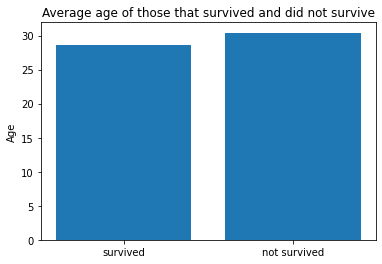

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt


survived_age=df[df['Survived']==1]['age'].mean()
print(survived_age)
not_survived_age=df[df['Survived']==0]['age'].mean()
print(not_survived_age)


plt.bar(['survived','not survived'], [survived_age,not_survived_age])
plt.title("Average age of those that survived and did not survive")
plt.ylabel('Age')
plt.show()
# your code here


-> your answer here
Averagely, the survivors were a little bit younger than the victims.

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

109
233
468
81
   survived  notsurvived
0  0.188908     0.811092
1  0.742038     0.257962


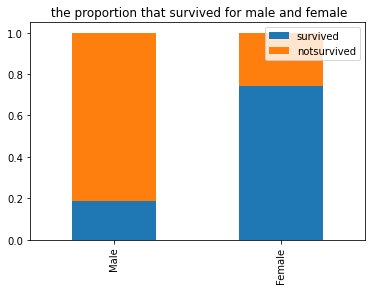

In [8]:
# your code here

survived_male=df.loc[(df['Survived'] ==1) & (df['sex'] == 0)].shape[0]
survived_female=df.loc[(df['Survived'] ==1) & (df['sex'] == 1)].shape[0]

print(survived_male)
print(survived_female)

not_survived_male=df.loc[(df['Survived'] ==0) & (df['sex'] == 0)].shape[0]
not_survived_female=df.loc[(df['Survived'] ==0) & (df['sex'] == 1)].shape[0]
print(not_survived_male)
print(not_survived_female)


dfplot=pd.DataFrame({'survived':[survived_male/(survived_male+not_survived_male),survived_female/(survived_female+not_survived_female)],'notsurvived':[not_survived_male/(not_survived_male+survived_male),not_survived_female/(not_survived_female+survived_female)]})
print(dfplot)

dfplot.plot(
    kind = 'bar',
    stacked = True,
    title = ' the proportion that survived for male and female')


plt.xticks([0,1], ['Male','Female'])

plt.show()






-> your answer here

The female had much higher survival rate than male, probably because they gave priority for survival to the female when the Titanic encoutnered the disaster. 


i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Don               1
 Ms                1
 the Countess      1
 Capt              1
 Jonkheer          1
 Mme               1
 Lady              1
 Sir               1
Name: Title, dtype: int64
{' Mr': 517, ' Miss': 182, ' Mrs': 125, ' Master': 40, ' Dr': 7, ' Rev': 6, ' Mlle': 2, ' Major': 2, ' Col': 2, ' Don': 1, ' Ms': 1, ' the Countess': 1, ' Capt': 1, ' Jonkheer': 1, ' Mme': 1, ' Lady': 1, ' Sir': 1}


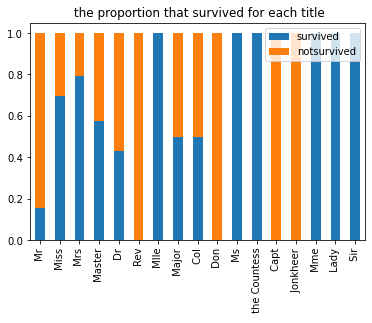

In [9]:
# your code here




s=df['Title'].value_counts()
print(s)
s=s.to_dict()
print(s)

survived=[]
not_survived=[]

for key in s.keys():
    survived.append(df.loc[(df['Survived'] ==1) & (df['Title'] == key)].shape[0]/s[key])
    not_survived.append(df.loc[(df['Survived'] ==0) & (df['Title'] == key)].shape[0]/s[key])
    
dfplot2=pd.DataFrame({'survived':survived,'notsurvived':not_survived})

dfplot2.plot(
    kind = 'bar',
    stacked = True,
    title = ' the proportion that survived for each title')

plt.xticks(range(0, len(s.keys())), list(s.keys()))
plt.show()


    




-> your answer here
People with title Mr. had the lowest survival rate among all passengers, except passengers with extremely minor titles, Don. Jonkheer., and Rev.

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

48.39540760233918
22.117886885245902


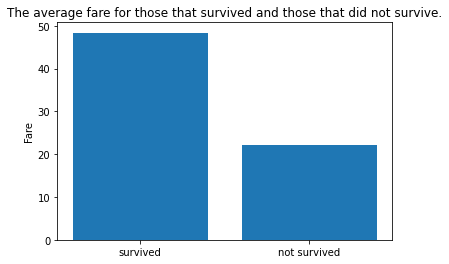

In [10]:

survived_fare=df[df['Survived']==1]['Fare'].mean()
print(survived_fare)
not_survived_fare=df[df['Survived']==0]['Fare'].mean()
print(not_survived_fare)


plt.bar(['survived','not survived'], [survived_fare,not_survived_fare])
plt.title("The average fare for those that survived and those that did not survive.")
plt.ylabel('Fare')
plt.show()
# your code here

-> your answer here
Averagely, the fare for survivors was more than twice as much as the fare for those victims.

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

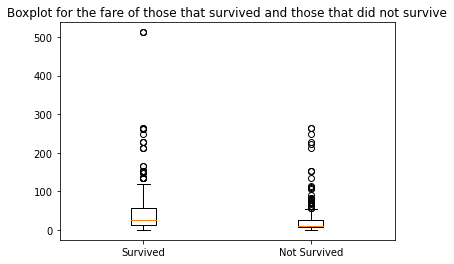

In [11]:
# Creating dataset

survived_farelist=df.loc[(df['Survived'] ==1)]['Fare'].to_list()
not_survived_farelist=df.loc[(df['Survived'] ==0)]['Fare'].to_list()





# print(survived_farelist)
# print(not_survived_farelist)

plt.boxplot([survived_farelist,not_survived_farelist])
plt.xticks([1,2], ['Survived','Not Survived'])

plt.title("Boxplot for the fare of those that survived and those that did not survive")
plt.show()
 
# Creating plot
# plt.boxplot(data)
 
# # show plot
# plt.show()

-> your answer here
The fare for most passengers concentrates on less then $100. 

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [12]:
# your code here
meanfare=df['Fare'].mean()
print(meanfare)
stdfare=df['Fare'].std()
print(stdfare)
df['Fare']=df['Fare'].apply(lambda x:(x-meanfare)/stdfare)

df.head()

32.204207968574636
49.6934285971809


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,First Name,Middle Name,Last Name,Title,age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502163,S,0,Owen,Harris,Braund,Mr,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786404,C,1,John,Bradley,Cumings,Mrs,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488580,S,1,Laina,,Heikkinen,Miss,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420494,S,1,Jacques,Heath,Futrelle,Mrs,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486064,S,0,William,Henry,Allen,Mr,35.0


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [13]:
df = df.select_dtypes(['number'])
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex,age
0,1,0,3,22.0,1,0,-0.502163,0,22.0
1,2,1,1,38.0,1,0,0.786404,1,38.0
2,3,1,3,26.0,0,0,-0.488580,1,26.0
3,4,1,1,35.0,1,0,0.420494,1,35.0
4,5,0,3,35.0,0,0,-0.486064,0,35.0


m) Ignoring passenger ID, write a function that returns the names of the N most similar passengers using the euclidean distance? - (15 points)

In [14]:
def N_most_similar(df, N):
    return # < your code here >

print("The 3 most similar passengers are: " + str(N_most_similar(df, 3)))

The 3 most similar passengers are: None


## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [15]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

for keyword in ['Python','Data Science','Data Analysis','Machine Learning','Deep Learning']:
    get(keyword)

python = get('Python')
data_science = get('Data Science')
data_analytics = get('Data Analysis')
machine_learning = get('Machine Learning')
deep_learning = get('Deep Learning')
print(python)

{'kind': 'books#volumes', 'totalItems': 1633, 'items': [{'kind': 'books#volume', 'id': 'Chr1NDlUcI8C', 'etag': 'OYfgRe0SwC0', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/Chr1NDlUcI8C', 'volumeInfo': {'title': 'Python Essential Reference', 'authors': ['David M. Beazley'], 'publisher': 'Addison-Wesley Professional', 'publishedDate': '2009', 'description': 'Presents a guide to the features and library modules of the Python programming language.', 'industryIdentifiers': [{'type': 'ISBN_13', 'identifier': '9780672329784'}, {'type': 'ISBN_10', 'identifier': '0672329786'}], 'readingModes': {'text': True, 'image': True}, 'pageCount': 717, 'printType': 'BOOK', 'categories': ['Computers'], 'averageRating': 4.5, 'ratingsCount': 9, 'maturityRating': 'NOT_MATURE', 'allowAnonLogging': True, 'contentVersion': '0.3.2.0.preview.3', 'imageLinks': {'smallThumbnail': 'http://books.google.com/books/content?id=Chr1NDlUcI8C&printsec=frontcover&img=1&zoom=5&edge=curl&source=gbs_api', 'thumbnail':

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [23]:
# your code here


for keyword in ['Python','Data Science','Data Analysis','Machine Learning','Deep Learning']:
    response=get(keyword)
    f=pd.json_normalize( response['items'] )
    f.to_csv(keyword+'.csv')



c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [27]:
for keyword in ['Python','Data Science','Data Analysis','Machine Learning','Deep Learning']:
    response=get(keyword)
    f=pd.json_normalize( response['items'] )
    
    f=f.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"})
    f.to_csv(keyword+'.csv')
    print(f.head())
    
    

# your code here

           kind            id         etag  \
0  books#volume  Chr1NDlUcI8C  4qAmFnsUUA8   
1  books#volume  zjqzDAEACAAJ  Ey8NPcwK4W8   
2  books#volume  bTUFCAAAQBAJ  kkdto24k8qE   
3  books#volume  4pgQfXQvekcC  GTi6Wrkg8Rw   
4  books#volume  9MS9BQAAQBAJ  UH7xz1iD4rs   

                                            selfLink  \
0  https://www.googleapis.com/books/v1/volumes/Ch...   
1  https://www.googleapis.com/books/v1/volumes/zj...   
2  https://www.googleapis.com/books/v1/volumes/bT...   
3  https://www.googleapis.com/books/v1/volumes/4p...   
4  https://www.googleapis.com/books/v1/volumes/9M...   

                        Title                 Authors  \
0  Python Essential Reference      [David M. Beazley]   
1        Python for Everybody  [Charles R. Severance]   
2            Effective Python         [Brett Slatkin]   
3             Learning Python             [Mark Lutz]   
4            Black Hat Python          [Justin Seitz]   

          volumeInfo.publisher volumeInfo.p

           kind            id         etag  \
0  books#volume  KqSKipJfxMwC  Uy8gufZM1ks   
1  books#volume  UiM3DwAAQBAJ  vnS0lKzNBKw   
2  books#volume  ZXL6AQAAQBAJ  FoyaXd7NSxw   
3  books#volume  eaz0DwAAQBAJ  ppr4CBP4W1w   
4  books#volume  6OSvDBE0rCIC  o0UN46jgx6o   

                                            selfLink  \
0  https://www.googleapis.com/books/v1/volumes/Kq...   
1  https://www.googleapis.com/books/v1/volumes/Ui...   
2  https://www.googleapis.com/books/v1/volumes/ZX...   
3  https://www.googleapis.com/books/v1/volumes/ea...   
4  https://www.googleapis.com/books/v1/volumes/6O...   

                                   Title  \
0               Head First Data Analysis   
1               Python for Data Analysis   
2  Bayesian Data Analysis, Third Edition   
3               Humanities Data Analysis   
4                          Data Analysis   

                                 volumeInfo.subtitle  \
0  A Learner's Guide to Big Numbers, Statistics, ...   
1     Dat

           kind            id         etag  \
0  books#volume  omivDQAAQBAJ  vobN3GlDF8c   
1  books#volume  Np9SDQAAQBAJ  p+FzEFuXmTk   
2  books#volume  1g0KywEACAAJ  l4g3RHr4ztU   
3  books#volume  eaCgDwAAQBAJ  avWrlOJcfRM   
4  books#volume  b06qDwAAQBAJ  b5xGhijB+fw   

                                            selfLink                    Title  \
0  https://www.googleapis.com/books/v1/volumes/om...            Deep Learning   
1  https://www.googleapis.com/books/v1/volumes/Np...            Deep Learning   
2  https://www.googleapis.com/books/v1/volumes/1g...            Deep Learning   
3  https://www.googleapis.com/books/v1/volumes/ea...  Dive Into Deep Learning   
4  https://www.googleapis.com/books/v1/volumes/b0...            Deep Learning   

                                             Authors volumeInfo.publisher  \
0   [Ian Goodfellow, Yoshua Bengio, Aaron Courville]            MIT Press   
1   [Ian Goodfellow, Yoshua Bengio, Aaron Courville]            MIT Press   
2    

d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [46]:
frames=[]

for keyword in ['Python','Data Science','Data Analysis','Machine Learning','Deep Learning']:
    
    response=get(keyword)
    f=pd.json_normalize( response['items'] )
    
    f=f.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"})
    f.to_csv(keyword+'.csv')
    
    
    
    f["Topic"]=keyword
    print(f.head())
    frames.append(f)
    
result=pd.concat(frames)
result.to_csv("alldata.csv")
    
    
    

           kind            id         etag  \
0  books#volume  Chr1NDlUcI8C  Q54fDEfBF0M   
1  books#volume  zjqzDAEACAAJ  DYkzdf78VUs   
2  books#volume  bTUFCAAAQBAJ  4/ZlJHUozKQ   
3  books#volume  4pgQfXQvekcC  zLFJrSrJmUM   
4  books#volume  9MS9BQAAQBAJ  ImZqpgvTV+I   

                                            selfLink  \
0  https://www.googleapis.com/books/v1/volumes/Ch...   
1  https://www.googleapis.com/books/v1/volumes/zj...   
2  https://www.googleapis.com/books/v1/volumes/bT...   
3  https://www.googleapis.com/books/v1/volumes/4p...   
4  https://www.googleapis.com/books/v1/volumes/9M...   

                        Title                 Authors  \
0  Python Essential Reference      [David M. Beazley]   
1        Python for Everybody  [Charles R. Severance]   
2            Effective Python         [Brett Slatkin]   
3             Learning Python             [Mark Lutz]   
4            Black Hat Python          [Justin Seitz]   

          volumeInfo.publisher volumeInfo.p

           kind            id         etag  \
0  books#volume  KqSKipJfxMwC  DlXMKBYkOzc   
1  books#volume  UiM3DwAAQBAJ  Gdp3WSgXsYc   
2  books#volume  ZXL6AQAAQBAJ  nO8nyU0rSW8   
3  books#volume  eaz0DwAAQBAJ  ZhXxuykLB7U   
4  books#volume  6OSvDBE0rCIC  59IzIArKr6s   

                                            selfLink  \
0  https://www.googleapis.com/books/v1/volumes/Kq...   
1  https://www.googleapis.com/books/v1/volumes/Ui...   
2  https://www.googleapis.com/books/v1/volumes/ZX...   
3  https://www.googleapis.com/books/v1/volumes/ea...   
4  https://www.googleapis.com/books/v1/volumes/6O...   

                                   Title  \
0               Head First Data Analysis   
1               Python for Data Analysis   
2  Bayesian Data Analysis, Third Edition   
3               Humanities Data Analysis   
4                          Data Analysis   

                                 volumeInfo.subtitle  \
0  A Learner's Guide to Big Numbers, Statistics, ...   
1     Dat

           kind            id         etag  \
0  books#volume  omivDQAAQBAJ  KivUwqIw6d0   
1  books#volume  Np9SDQAAQBAJ  Bi4zGw/kv/8   
2  books#volume  1g0KywEACAAJ  2smkIYB2YHk   
3  books#volume  eaCgDwAAQBAJ  kBAN2mlSE20   
4  books#volume  b06qDwAAQBAJ  bw6s026TLBg   

                                            selfLink                    Title  \
0  https://www.googleapis.com/books/v1/volumes/om...            Deep Learning   
1  https://www.googleapis.com/books/v1/volumes/Np...            Deep Learning   
2  https://www.googleapis.com/books/v1/volumes/1g...            Deep Learning   
3  https://www.googleapis.com/books/v1/volumes/ea...  Dive Into Deep Learning   
4  https://www.googleapis.com/books/v1/volumes/b0...            Deep Learning   

                                             Authors volumeInfo.publisher  \
0   [Ian Goodfellow, Yoshua Bengio, Aaron Courville]            MIT Press   
1   [Ian Goodfellow, Yoshua Bengio, Aaron Courville]            MIT Press   
2    

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [35]:
# your code here


def containdata(df):
    return df[df['Title'].str.contains('Data')]
    

print(containdata(result))





           kind            id         etag  \
0  books#volume  vfi3DQAAQBAJ  P2YzmonTjoo   
1  books#volume  TFpVDwAAQBAJ  maEvZ03Skus   
2  books#volume  xb29DwAAQBAJ  58XmVcxccz4   
3  books#volume  6omNDQAAQBAJ  Np2yobWPPOg   
4  books#volume  JYodCAAAQBAJ  w169Pln1jLs   
5  books#volume  4ZctAAAAQBAJ  9P8e+pxyKGw   
6  books#volume  UG76DwAAQBAJ  gmJf2xA3SiU   
7  books#volume  -OQ2q5JqOdEC  EtxWd0N06w0   
8  books#volume  vcVKAQAAQBAJ  r32ingPUSuo   
9  books#volume  8GnLDwAAQBAJ  WYzd8u2rADg   
0  books#volume  KqSKipJfxMwC  QjGTuLiWi+Q   
1  books#volume  UiM3DwAAQBAJ  FXDz7uE6WsE   
2  books#volume  ZXL6AQAAQBAJ  9jw3iSbzR5s   
3  books#volume  eaz0DwAAQBAJ  BP3lDG7nYrc   
4  books#volume  6OSvDBE0rCIC  mKJf0sL0F/c   
5  books#volume  q6bwDwAAQBAJ  SaDu8Z13Qwc   
6  books#volume  JhL2FiF3hO4C  2MJGgCrEDNY   
7  books#volume  Ha0jEAAAQBAJ  M4JzjFENQg4   
8  books#volume  fBPEAgAAQBAJ  BXjTk96e7FY   
9  books#volume  tO4CEAAAQBAJ  w1lVTTJOnj4   

                                 

f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [57]:
def e(df):
    return df.loc[df['Authors'][0]=="E" |df['Authors'][-1]=="E" ]
    
print(result['Authors'].str)
print(e(result))